In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

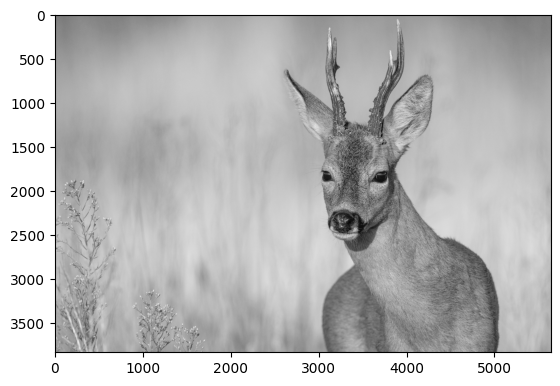

In [21]:
# read image using opencv
img = cv2.imread('../images/deer.jpg', 0)

plt.imshow(img, cmap='gray')
plt.show()

In [22]:
img.shape

(3837, 5642)

In [23]:
def calculate_histogram(image):
    histogram = [0] * 256
    for pixel in image.flatten():
        histogram[pixel] += 1

    return histogram

In [24]:
def histogram_equalization(img):
    
    histogram, _ = np.histogram(img.flatten(), bins=256, range=(0, 256))

    
    pdf = histogram / histogram.sum()

    
    cdf = np.cumsum(pdf)

    
    cdf_normalized = (cdf * 255).astype(np.uint8)

    
    equalized_img = cdf_normalized[img]

    return equalized_img

In [25]:
equalized_img = histogram_equalization(img)

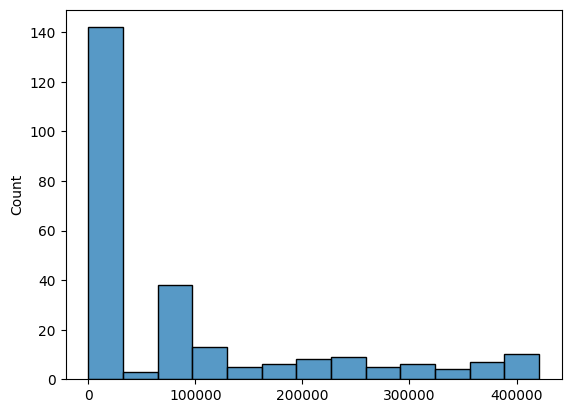

In [26]:
final_hist = calculate_histogram(equalized_img.astype(np.int32))

sns.histplot(final_hist)
plt.show()

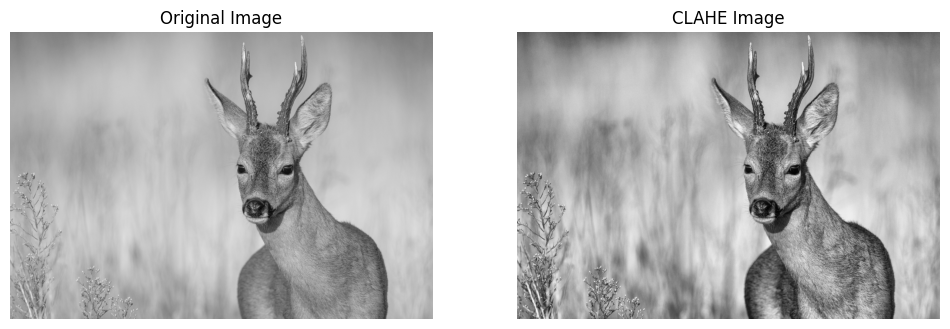

In [27]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

clahe_img = clahe.apply(img)

plt.figure(figsize=(12, 8))

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.axis('off')

plt.subplot(122), plt.imshow(clahe_img, cmap='gray')
plt.title('CLAHE Image'), plt.axis('off')

plt.show()


In [28]:
equalized_hist = calculate_histogram(equalized_img.astype(np.int32))
original_hist = calculate_histogram(img.astype(np.int32))
clahe_hist = calculate_histogram(clahe_img.astype(np.int32))

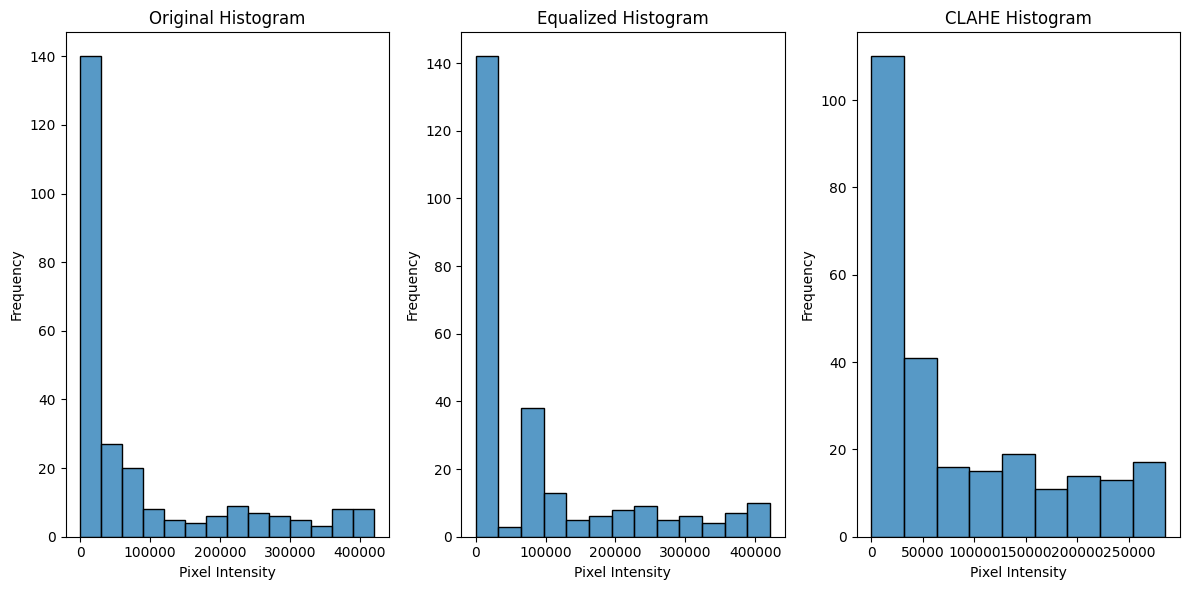

In [34]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.histplot(original_hist)
plt.title('Original Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(equalized_hist)
plt.title('Equalized Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(clahe_hist)
plt.title('CLAHE Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()